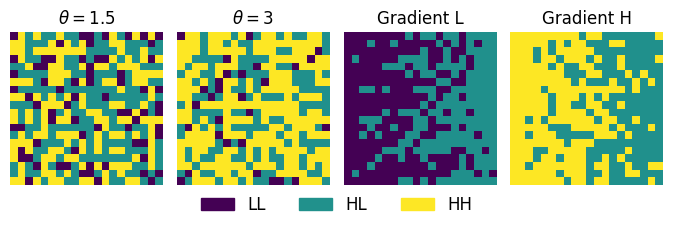

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from model import LearningModel

def plot_food_environments():
    # Create four environments
    envs = [
        LearningModel(N=0, width=20, height=20, distribute_patches='random', theta=1.5),
        LearningModel(N=0, width=20, height=20, distribute_patches='random', theta=3),
        LearningModel(N=0, width=20, height=20, distribute_patches='gradient_l'),
        LearningModel(N=0, width=20, height=20, distribute_patches='gradient_h'),
    ]
    titles = [r"$\theta=1.5$", r"$\theta=3$", "Gradient L", "Gradient H"]

    fig, axes = plt.subplots(1, 4, figsize=(6.7, 2))  # JASSS single-column width
    cmap = cm.viridis
    colors = [cmap(0/2), cmap(1/2), cmap(2/2)]  # discrete color samples

    for ax, model, title in zip(axes, envs, titles):
        data = model.grid.properties["patch_type"].data
        ax.imshow(data.T, cmap=cmap, vmin=0, vmax=2, origin="lower")
        ax.set_title(title, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Legend patches (shared)
    legend_labels = ["LL", "HL", "HH"]
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, legend_labels)]
    fig.legend(patches, legend_labels, loc="lower center", ncol=3, fontsize=12, frameon=False)

    plt.tight_layout(pad=0.2, rect=[0, 0.2, 1, 1])  # leave space for legend

    plt.savefig("resub/food_environments.png", dpi=600, bbox_inches='tight')
    plt.savefig("resub/food_environments.pdf", dpi=600, bbox_inches='tight')
    plt.show()

plot_food_environments()
